# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [ ]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

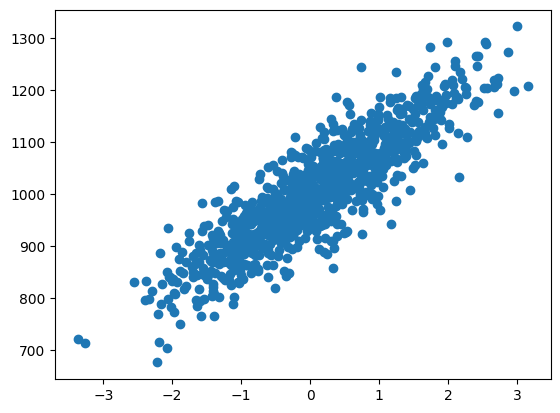

In [ ]:
plt.scatter(data[0], data[1])
plt.show()

In [ ]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


In [ ]:
n_data = x_train.shape[0]

In [ ]:
n_data

1000

## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS -> MSE

 Residual Sum of sqaure(RSS) : 잔차 제곱합  
 =SSE

In [ ]:
hypothesis = w1 * x_train + w0 # y_pred (1000, )

cost = 1/n_data * np.sum(hypothesis - y_train)**2  # (1000,) -> sum (1, )


## Weight 초기화

In [ ]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.75232536] [0.70855907]


## y_pred 계산

-> hypothesis

In [ ]:
y_pred = w1 * x_train + w0

In [ ]:
y_pred.shape

(1000, 1)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [ ]:
np.array([1, 2, 3]) + 3

array([4, 5, 6])

In [ ]:
y_pred.shape

(1000, 1)

In [ ]:
y_train.shape

(1000,)

In [ ]:
(y_pred - y_train).shape

(1000, 1000)

In [ ]:
cost = np.sum((y_pred - y_train)**2) / n_data
cost

1016960309.0380213

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [ ]:
x_train.shape

(1000, 1)

In [ ]:
y_train.shape

(1000,)

In [ ]:
y_train.reshape(-1, 1).shape

(1000, 1)

In [ ]:
((y_pred - y_train.reshape(-1, 1)) * x_train).shape

(1000, 1)

In [ ]:
w1 -= np.sum((y_pred - y_train.reshape(-1, 1)) * x_train) * 2 / n_data
w0 -= np.sum((y_pred - y_train.reshape(-1, 1))) * 2 / n_data

In [ ]:
w1, w0

(array([325.4126958]), array([2006.71635371]))

In [ ]:
w1 -= learning_rate * np.sum((y_pred - y_train.reshape(-1, 1)) * x_train) * 2 / n_data
w0 -= learning_rate * np.sum((y_pred - y_train.reshape(-1, 1))) * 2 / n_data

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output
    - clear_output()

In [ ]:
epochs = 1000
learning_rate = 0.01

In [ ]:
cost_list = []

for epoch in range(epochs):
  # 1. y_pred 계산
  y_pred = w1 * x_train + w0  # (1000, 1)

  # 2. cost 계산
  cost = np.mean((y_pred.reshape(-1) - y_train) ** 2)

  # 3. weight 업데이트
  gradient_w1 = np.sum((y_pred - y_train.reshape(-1, 1)) * x_train * 2) / n_data
  w1 -= learning_rate * gradient_w1

  gradient_w0 = np.sum((y_pred - y_train.reshape(-1, 1)) * 2) / n_data
  w0 -= learning_rate * gradient_w0

  cost_list.append(cost)


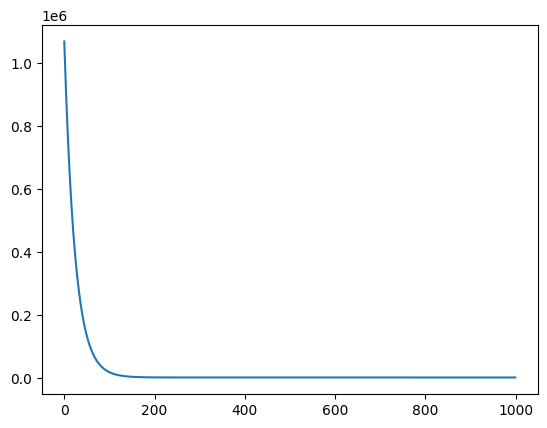

In [ ]:
plt.plot(cost_list)
plt.show()

In [ ]:
w1, w0

(array([88.07373852]), array([997.87584286]))

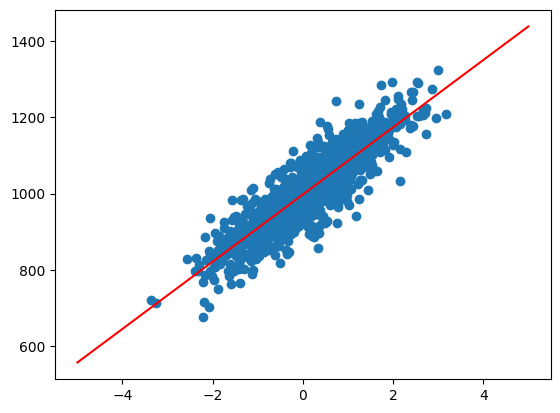

In [ ]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], color='r')
plt.scatter(x_train, y_train)
plt.show()

In [ ]:
class SimpleLinearRegression:

  def __int__(self):
    ...

  def fit(self, x_data, y_data):
    ...

  def predict(self, x_data):
    return

  def score(self, y1, y2):
    return

In [ ]:
data = make_regression(n_samples = 1000, n_features = 5, bias = 1000, noise = 50)

x_train = data[0]
y_train = data[1]

In [ ]:
x_train[0]

array([ 1.03289813,  0.19076953, -2.07267351,  0.14689553, -1.73480738])

In [ ]:
x_train.shape, y_train.shape

((1000, 5), (1000,))

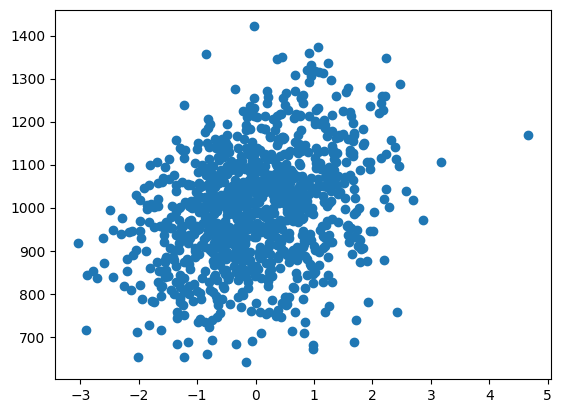

In [ ]:
plt.scatter(x_train[:, 3], y_train)
plt.show()

In [ ]:
# 선형회귀 가설함수
Hx = w0 + w1*x_train[:, 0] + w2 * x_train[:, 1]+ ... w5 *x_train[:, 4]

In [ ]:
w = np.random.rand(x_train.shape[1])

In [ ]:
w0 = np.random.rand(1)

In [ ]:
y_pred = (w * x_train).sum(axis=1) + w0

In [ ]:
y_pred.shape

(1000,)

In [ ]:
# cost 계산
cost = np.mean((y_pred - y_train)**2)

In [ ]:
cost

1013061.9649865079

In [ ]:
# weight 업데이트
for i in range(x_train.shape[1]):
    # w[i] -= gradient
    w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * 0.01 #learning rate

w0 -= np.mean(y_pred-y_train) * 2 * 0.01 # learning rate

In [ ]:
w

array([2.52799364, 1.25997458, 2.25802312, 1.19288096, 0.33608942])

In [ ]:
w0

array([20.38117014])

In [ ]:
# 종합
learning_rate = 0.01

cost_list = []
for epoch in range(1000):
    y_pred = (w * x_train).sum(axis=1) + w0
    cost = np.mean((y_pred - y_train)**2)

    # weight 업데이트
    for i in range(x_train.shape[1]):
        # w[i] -= gradient
        w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * learning_rate

    w0 -= np.mean(y_pred-y_train) * 2 * learning_rate

    cost_list.append(cost)

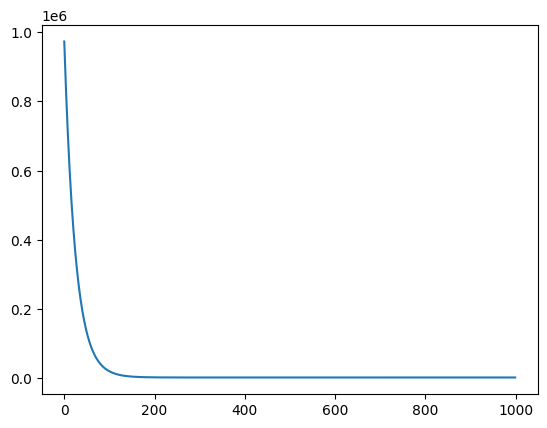

In [ ]:
plt.plot(cost_list)

In [ ]:
x_data = np.hstack([x_train, np.ones((1000, 1))])

In [ ]:
w = np.random.rand(x_train.shape[1] + 1)

In [ ]:
w

array([0.90899794, 0.95707283, 0.54313104, 0.18840989, 0.40859459,
       0.52216187])

In [ ]:
w1x1+ w2x2+ ... + w0x0 = WX

In [ ]:
cost = np.mean(( (w * x_data).sum(axis=1) - y_train)**2)

In [ ]:
cost

1012722.1641276784

In [ ]:
np.mean(((y_pred - y_train).reshape(-1, 1) * x_data), axis=0)

array([ 2.81011277e-06,  4.49279164e-06,  2.11083581e-06,  5.57640357e-07,
       -6.02346733e-06, -6.33426473e-06])

In [ ]:
x_data.shape

(1000, 6)

In [ ]:
# weight 업데이트 ??
w[i] -= np.mean((y_pred - y_train) * x_train[:, i]) * 2 * learning_rate

In [ ]:
w -= np.mean(((y_pred - y_train).reshape(-1, 1) * x_data), axis=0) * 2 * learning_rate